In [218]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import getpass
import seaborn as sb
import matplotlib.pyplot as plt

In [219]:
user= getpass.getuser()

In [220]:
df_train = pd.read_csv("C:\\Users\\"+user+"\\Desktop\\EDA\\HR\\train.csv")
df_test = pd.read_csv("C:\\Users\\"+user+"\\Desktop\\EDA\\HR\\test.csv")

In [221]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [222]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [223]:
df_train.shape

(54808, 14)

In [224]:
df_test.shape

(23490, 13)

In [225]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [226]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


## Handling Null Values

In [227]:
df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [228]:
df_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

From the above cell, we find that null values are present in education and previous_year_rating columns.

#### Education  -  Categorical 
#### previous_year_rating - Numerical (Float) 


In [229]:
df_train['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [230]:
df_test['education'].unique()

array(["Bachelor's", "Master's & above", nan, 'Below Secondary'],
      dtype=object)

In [231]:
education_mode = df_train.education.mode()[0]

In [232]:
education_mode

"Bachelor's"

In general, maximum people starts job after their bachelor's degree. In the dataset also, maximum people's education is Bachelors. Hence, filling education null values with mode value.

In [233]:
df_train['education'] = df_train['education'].fillna(education_mode)
df_test['education'] = df_test['education'].fillna(education_mode)

### Filling previous_year_rating null values with random imputation

In [234]:
def random_imputation(data,variable):
    data[variable+'_imputation'] = data['previous_year_rating']
    random = data[variable+'_imputation'].dropna().sample(data[variable+'_imputation'].isnull().sum(),random_state=0)
    random.index = data[data[variable+'_imputation'].isnull()].index
    data.loc[data[variable+'_imputation'].isnull(),variable+'_imputation'] = random
    
random_imputation(df_train,'previous_year_rating')
random_imputation(df_test,'previous_year_rating')

In [235]:
df_train = df_train.drop(['previous_year_rating'],axis=1)
df_test = df_test.drop(['previous_year_rating'],axis=1)

In [236]:
df_train = df_train.rename(columns={'previous_year_rating_imputation':'previous_year_rating'})
df_test = df_test.rename(columns={'previous_year_rating_imputation':'previous_year_rating'})

In [237]:
df_train.isnull().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
previous_year_rating    False
dtype: bool

In [238]:
df_test.isnull().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
previous_year_rating    False
dtype: bool

In [239]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,previous_year_rating
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,8,1,0,49,0,5.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,4,0,0,60,0,5.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,7,0,0,50,0,3.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,10,0,0,50,0,1.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,2,0,0,73,0,3.0


### Dropping employee_id column

In [240]:
# Dropping employee_id column 
#df_train = df_train.drop(['employee_id'],axis=1)
#df_test = df_test.drop(['employee_id'],axis=1)

### Data Visualization

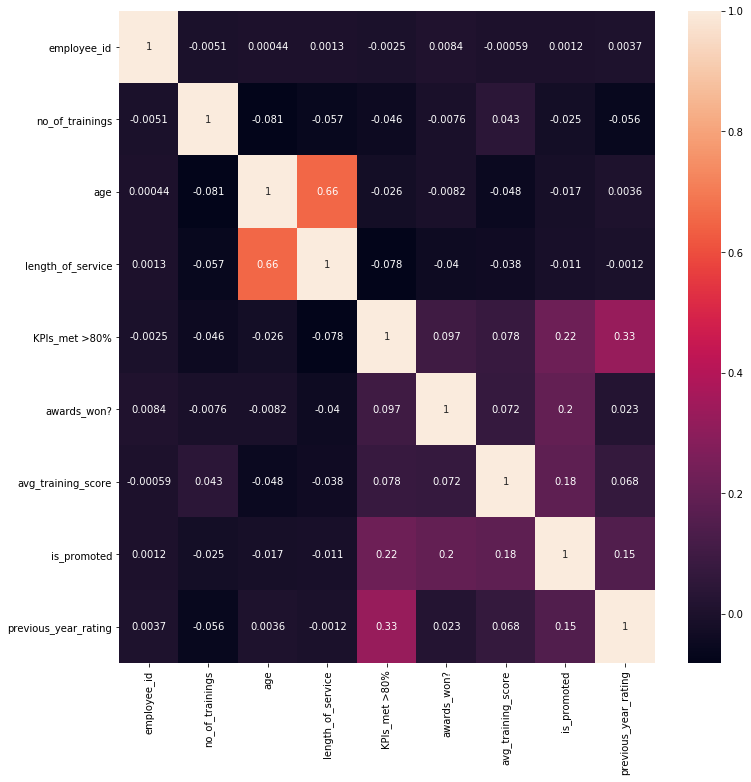

In [241]:
f,ax = plt.subplots(figsize=(12,12))
sb.heatmap(df_train.corr(),annot=True);

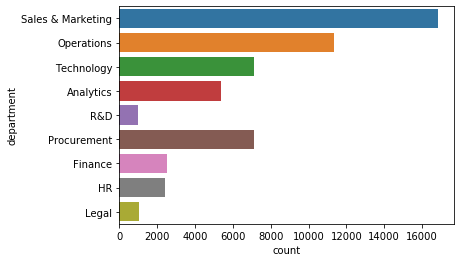

In [242]:
sb.countplot(y=df_train['department']);

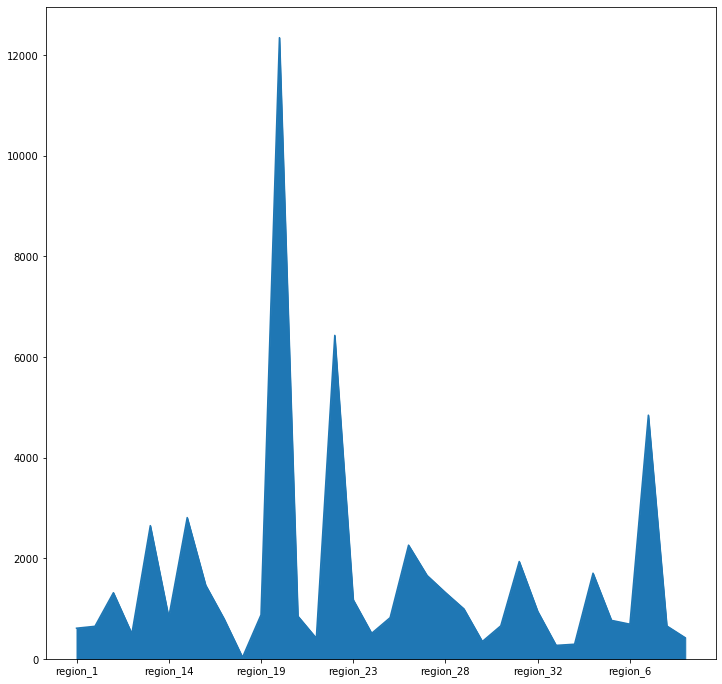

In [243]:
f,ax = plt.subplots(figsize=(12,12))
df_train['region'].value_counts().sort_index().plot.area();

## Encoding Techniques

### Converting categorical values to numerical values

-> Using Target Guided Ordinal Encoding for department feature

-> Using probability ratio encoding for region  feature

-> Using Count\Frequency encoding method for education feature

-> Using One Hot Encoding for gender feature

-> Using mapping method for recruitment_channel feature

### 1. Target Guided Ordinal Encoding for department feature

In [244]:
df_train['department'] = df_train['department'].str[0]

In [245]:
df_train.groupby(['department'])['is_promoted'].mean().sort_values()

department
L    0.051011
H    0.056245
R    0.069069
S    0.072031
F    0.081230
O    0.090148
A    0.095665
P    0.096386
T    0.107593
Name: is_promoted, dtype: float64

In [246]:
ordinal_labels = df_train.groupby(['department'])['is_promoted'].mean().sort_values().index

In [247]:
ordinal_labels

Index(['L', 'H', 'R', 'S', 'F', 'O', 'A', 'P', 'T'], dtype='object', name='department')

In [248]:
dict_labels = {k:i for i,k in enumerate(ordinal_labels,0)}

In [249]:
dict_labels

{'L': 0, 'H': 1, 'R': 2, 'S': 3, 'F': 4, 'O': 5, 'A': 6, 'P': 7, 'T': 8}

In [250]:
df_train['department'] = df_train['department'].map(dict_labels)

In [251]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,previous_year_rating
0,65438,3,region_7,Master's & above,f,sourcing,1,35,8,1,0,49,0,5.0
1,65141,5,region_22,Bachelor's,m,other,1,30,4,0,0,60,0,5.0
2,7513,3,region_19,Bachelor's,m,sourcing,1,34,7,0,0,50,0,3.0
3,2542,3,region_23,Bachelor's,m,other,2,39,10,0,0,50,0,1.0
4,48945,8,region_26,Bachelor's,m,other,1,45,2,0,0,73,0,3.0


#### We cannot apply target guided ordinal encoding technique to test data. Hence, using Count/Frequency Encoding  method to convert the department value to numerical value. 

In [252]:
df_test['department'] = df_test['department'].str[0]
department= df_test['department'].value_counts().index

In [253]:
department_labels = {k:i for i,k in enumerate(department,0)}

In [254]:
department_labels

{'S': 0, 'O': 1, 'P': 2, 'T': 3, 'A': 4, 'F': 5, 'H': 6, 'L': 7, 'R': 8}

In [255]:
df_test['department'] = df_test['department'].map(department_labels)

### 2. probability ratio encoding for region feature

In [256]:
df_train.region.unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [257]:
reg_values = df_train.groupby(['region'])['is_promoted'].mean().sort_values()

In [258]:
reg_values = pd.DataFrame(reg_values)

In [259]:
reg_values['not_promoted'] = 1 - reg_values['is_promoted']

In [260]:
reg_values['prob_ratio_en'] = reg_values['is_promoted']/reg_values['not_promoted']

In [261]:
prob_encoded = reg_values['prob_ratio_en'].to_dict()

In [262]:
df_train['region'] = df_train['region'].map(prob_encoded)

#### We cannot apply probability ration encoding technique to test data. Hence, using Count/Frequency Encoding method to convert the department value to numerical value. 

In [263]:
region= df_test['region'].value_counts().index

In [264]:
region

Index(['region_2', 'region_22', 'region_7', 'region_13', 'region_15',
       'region_26', 'region_31', 'region_4', 'region_27', 'region_28',
       'region_16', 'region_11', 'region_23', 'region_32', 'region_29',
       'region_19', 'region_17', 'region_14', 'region_5', 'region_25',
       'region_20', 'region_6', 'region_30', 'region_10', 'region_8',
       'region_1', 'region_24', 'region_12', 'region_9', 'region_21',
       'region_34', 'region_3', 'region_33', 'region_18'],
      dtype='object')

In [265]:
region_labels = {k:i for i,k in enumerate(region,0)}

In [266]:
region_labels

{'region_2': 0,
 'region_22': 1,
 'region_7': 2,
 'region_13': 3,
 'region_15': 4,
 'region_26': 5,
 'region_31': 6,
 'region_4': 7,
 'region_27': 8,
 'region_28': 9,
 'region_16': 10,
 'region_11': 11,
 'region_23': 12,
 'region_32': 13,
 'region_29': 14,
 'region_19': 15,
 'region_17': 16,
 'region_14': 17,
 'region_5': 18,
 'region_25': 19,
 'region_20': 20,
 'region_6': 21,
 'region_30': 22,
 'region_10': 23,
 'region_8': 24,
 'region_1': 25,
 'region_24': 26,
 'region_12': 27,
 'region_9': 28,
 'region_21': 29,
 'region_34': 30,
 'region_3': 31,
 'region_33': 32,
 'region_18': 33}

In [267]:
df_test['region'] = df_test['region'].map(region_labels)

In [268]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating
0,8724,3,5,Bachelor's,m,sourcing,1,24,1,1,0,77,3.0
1,74430,6,7,Bachelor's,f,other,1,31,5,0,0,51,3.0
2,72255,0,3,Bachelor's,m,other,1,31,4,0,0,47,1.0
3,38562,2,0,Bachelor's,f,other,3,31,9,0,0,65,2.0
4,64486,5,14,Bachelor's,m,sourcing,1,30,7,0,0,61,4.0


### 3. Count\Frequency encoding method for education feature

In [269]:
train_edu_dict = df_train['education'].value_counts().to_dict()
test_edu_dict = df_test['education'].value_counts().to_dict()

In [270]:
df_train['education'] = df_train['education'].map(train_edu_dict)
df_test['education'] = df_test['education'].map(test_edu_dict)

In [271]:
df_train['gender'].isnull().sum()
df_test['gender'].isnull().sum()

0

In [272]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating
0,8724,3,5,16612,m,sourcing,1,24,1,1,0,77,3.0
1,74430,6,7,16612,f,other,1,31,5,0,0,51,3.0
2,72255,0,3,16612,m,other,1,31,4,0,0,47,1.0
3,38562,2,0,16612,f,other,3,31,9,0,0,65,2.0
4,64486,5,14,16612,m,sourcing,1,30,7,0,0,61,4.0


### 4. One Hot Encoding for gender feature

In [273]:
df_train['gender']=pd.get_dummies(df_train['gender'],drop_first=True,dummy_na=False)
df_test['gender']=pd.get_dummies(df_test['gender'],drop_first=True,dummy_na=False)

In [274]:
df_train.isnull().sum()
df_test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
previous_year_rating    0
dtype: int64

In [275]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,previous_year_rating
0,65438,3,0.119251,14925,0,sourcing,1,35,8,1,0,49,0,5.0
1,65141,5,0.128908,39078,1,other,1,30,4,0,0,60,0,5.0
2,7513,3,0.064555,39078,1,sourcing,1,34,7,0,0,50,0,3.0
3,2542,3,0.131985,39078,1,other,2,39,10,0,0,50,0,1.0
4,48945,8,0.067548,39078,1,other,1,45,2,0,0,73,0,3.0


In [276]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating
0,8724,3,5,16612,1,sourcing,1,24,1,1,0,77,3.0
1,74430,6,7,16612,0,other,1,31,5,0,0,51,3.0
2,72255,0,3,16612,1,other,1,31,4,0,0,47,1.0
3,38562,2,0,16612,0,other,3,31,9,0,0,65,2.0
4,64486,5,14,16612,1,sourcing,1,30,7,0,0,61,4.0


### 5. mapping method for recruitment_channel feature

In [277]:
df_train['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [278]:
dict_channel = {'referred':1,'sourcing':2,'other':3}

In [279]:
df_train['recruitment_channel']=df_train['recruitment_channel'].map(dict_channel)
df_test['recruitment_channel']=df_test['recruitment_channel'].map(dict_channel)

In [280]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,previous_year_rating
0,65438,3,0.119251,14925,0,2,1,35,8,1,0,49,0,5.0
1,65141,5,0.128908,39078,1,3,1,30,4,0,0,60,0,5.0
2,7513,3,0.064555,39078,1,2,1,34,7,0,0,50,0,3.0
3,2542,3,0.131985,39078,1,3,2,39,10,0,0,50,0,1.0
4,48945,8,0.067548,39078,1,3,1,45,2,0,0,73,0,3.0


In [281]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating
0,8724,3,5,16612,1,2,1,24,1,1,0,77,3.0
1,74430,6,7,16612,0,3,1,31,5,0,0,51,3.0
2,72255,0,3,16612,1,3,1,31,4,0,0,47,1.0
3,38562,2,0,16612,0,3,3,31,9,0,0,65,2.0
4,64486,5,14,16612,1,2,1,30,7,0,0,61,4.0


### StandardScalar

In [282]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.model_selection import train_test_split

In [283]:
X = df_train.drop(['is_promoted'],axis=1)
Y = df_train['is_promoted']
x_train, x_valid, y_train, y_valid = train_test_split(X,Y,test_size=0.2,random_state=1)
x_test = df_test

In [284]:
x_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating
0,8724,3,5,16612,1,2,1,24,1,1,0,77,3.0
1,74430,6,7,16612,0,3,1,31,5,0,0,51,3.0
2,72255,0,3,16612,1,3,1,31,4,0,0,47,1.0
3,38562,2,0,16612,0,3,3,31,9,0,0,65,2.0
4,64486,5,14,16612,1,2,1,30,7,0,0,61,4.0


In [285]:
scalar = StandardScaler()
#df_scaled = scalar.fit_transform(df_train)
#train_encoded = df_train[['department','region','education','gender','recruitment_channel']]
columns = x_test.drop(['employee_id'],axis=1)
x_train = pd.DataFrame(scalar.fit_transform(x_train),columns=x_train.columns)
x_valid = pd.DataFrame(scalar.fit_transform(x_valid),columns=x_valid.columns)
x_columns = pd.DataFrame(scalar.fit_transform(columns),columns=columns.columns)

In [286]:
x_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating
0,8724,3,5,16612,1,2,1,24,1,1,0,77,3.0
1,74430,6,7,16612,0,3,1,31,5,0,0,51,3.0
2,72255,0,3,16612,1,3,1,31,4,0,0,47,1.0
3,38562,2,0,16612,0,3,3,31,9,0,0,65,2.0
4,64486,5,14,16612,1,2,1,30,7,0,0,61,4.0


In [287]:
gnb = GaussianNB()

In [288]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [289]:
y_pred = gnb.predict(x_valid)

In [290]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [291]:
print("Accuracy_score: ",accuracy_score(y_valid,y_pred))

Accuracy_score:  0.913154533844189


In [292]:
f1_score(y_valid,y_pred,average='macro')

0.5836319429427297

In [293]:
final_list = [x_test['employee_id'],x_columns]
final_df = pd.concat(final_list,axis=1)

In [294]:
final_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating
0,8724,0.468530,-0.288035,0.635543,0.644516,-1.003423,-0.423094,-1.404150,-1.143200,1.336715,-0.152665,1.024263,-0.268265
1,74430,1.919393,-0.051016,0.635543,-1.551551,0.863244,-0.423094,-0.492612,-0.192590,-0.748103,-0.152665,-0.914377,-0.268265
2,72255,-0.982333,-0.525054,0.635543,0.644516,0.863244,-0.423094,-0.492612,-0.430243,-0.748103,-0.152665,-1.212629,-1.850972
3,38562,-0.015091,-0.880583,0.635543,-1.551551,0.863244,2.905264,-0.492612,0.758019,-0.748103,-0.152665,0.129506,-1.059618
4,64486,1.435772,0.778551,0.635543,0.644516,-1.003423,-0.423094,-0.622832,0.282714,-0.748103,-0.152665,-0.168746,0.523088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,2.403014,-0.880583,-2.739994,0.644516,-1.003423,-0.423094,-1.404150,-1.143200,-0.748103,-0.152665,-0.168746,-0.268265
23486,25600,0.468530,1.371099,0.635543,0.644516,-1.003423,-0.423094,-0.492612,0.282714,-0.748103,-0.152665,0.800574,-0.268265
23487,45409,1.919393,0.304513,0.635543,-1.551551,-1.003423,-0.423094,-1.143711,-0.430243,-0.748103,-0.152665,-0.988940,0.523088
23488,1186,-0.015091,-0.169526,0.635543,0.644516,-1.003423,2.905264,-1.013491,-1.143200,-0.748103,-0.152665,0.502321,1.314442


In [295]:
final_pred = gnb.predict(final_df)

In [296]:
final_pred = pd.DataFrame(final_pred,columns=['is_promoted'])

In [297]:
final_list1 = [final_df['employee_id'],final_pred]

In [298]:
final_list1 = pd.concat(final_list1,axis=1)

In [299]:
final_list1['is_promoted'].value_counts()

1    23473
0       17
Name: is_promoted, dtype: int64

In [300]:
final_list1.to_csv("C:\\Users\\"+user+"\\Desktop\\EDA\\HR\\Solution.csv")